In [46]:
%load_ext autoreload
%autoreload 2

import os
from vectorification import *
import pandas as pd
from sentence_transformers import SentenceTransformer
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/michal/Documents/Health Hackaton/EHH2025/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [47]:
sentences = ["UACR 5 10 nan", "UACR 2 nan 5", "UACR 2 2 2", "UACR 3 5 7"]

model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embeddings = model.encode(sentences)
embeddings = np.array(embeddings)
cross_embeddings_dot = np.dot(embeddings, embeddings.T)
print(cross_embeddings_dot)

[[1.0000001  0.94561505 0.62933564 0.7200044 ]
 [0.94561505 1.         0.6962034  0.7445646 ]
 [0.62933564 0.6962034  0.9999999  0.77221775]
 [0.7200044  0.7445646  0.77221775 1.0000002 ]]


In [3]:
sample_patients = (1211040,1180770,1175090,97360,1194490,1522810)
all_patients_ids = PATIENTS.Patient
print("Number of patients:", len(all_patients_ids))

for p in sample_patients:
    print("PATIENT", p)
    patient = get_patient_data(p)
    for key in patient.keys():
        print(key, patient[key])

Number of patients: 16097
PATIENT 1211040
labs Empty DataFrame
Columns: [Patient, EntryDate, Analyte, ValueNumber, ValueText, Unit, UnderLower, OverUpper]
Index: []
reports    Patient  ReportId  ReportType   EntryDate Clinic           Unit
0  1211040   1853949  Outpatient  2015-06-18    ULM  IKEM.ULM.IPAM
transplantations Empty DataFrame
Columns: [Patient, EntryDate, Organs, kidney, heart, liver, pancreas, islets, veins, uterus, small_intestine]
Index: []
patients       Unnamed: 0  Patient DateOfBirth Sex
5582        5582  1211040  1958-09-04   M
diagnoses    Patient  ReportID                                                 Dg  \
0  1211040   1853949  T63.4: Dechová tíseň po bodnutí více včelami v...   
1  1211040   1853949            J30.3: Únava - senzibilizace na roztoče   

   E10_Diabetes_I  E11_Diabetes_II  E_Diabetes_other  Obesity  Hypertension  \
0               0                0                 0        0             0   
1               0                0                 0 

In [4]:
# print(LABS.groupby("Patient")['Patient'].count().mean())
# print(MEDS.groupby("Patient")['Patient'].count().mean())
for table,name in zip(ALL_TABLES,TABLE_NAMES):
    print(name)
    print(len(table['Patient'].unique()))
    print(table.groupby("Patient")['Patient'].count().mean())
    print(table.groupby("Patient")['Patient'].count().max())
    print(table.groupby("Patient")['Patient'].count().min())

labs
11547
21.42608469732398
579
1
medications
11014
64.34919193753404
3175
1
reports
16097
10.596757159719202
263
1
transplantations
490
1.063265306122449
3
1
patients
16097
1.0
1
1
diagnoses
16097
48.115735851400885
2978
1


In [39]:
patients = {}
for p_id in all_patients_ids:
    patient_d = get_patient_data(p_id)
    patients[p_id] = Patient(patient_d)
# create_timeline_from_patient_data(get_patient_data(97360))

In [16]:
# create_timeline_from_patient_data(get_patient_data(97360))
#HEALTHY PATIENT
ckd_positive = pd.read_csv(DATA_DIR / "ckd_positive.csv",index_col=False, header=0)
ckd_negative = pd.read_csv(DATA_DIR / "ckd_negative.csv",index_col=False, header=0)

print(ckd_positive.columns)


Index(['Patient_id'], dtype='object')


In [40]:
print(LABS[(LABS['Analyte']=="CKD-EPI")]['ValueNumber'].max())
LABS.drop(LABS[(LABS['Analyte']=="CKD-EPI") & (LABS['ValueNumber']>90)].index,inplace=True)

4.92


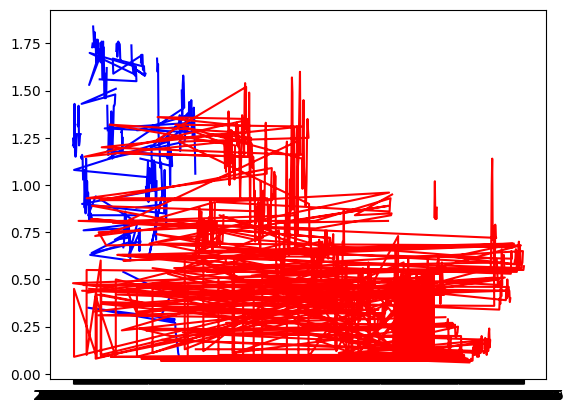

In [45]:
# print(LABS[36])

for p_id in ckd_negative['Patient_id'][:40]:
    query = patients[p_id].get_CKD_EPI()[['EntryDate','ValueNumber']]
    date,value =query.values.T
    # print(query)
    plt.plot(date,value,label='Healthy Patient',color='blue')
#CKD PATIENT
for p_id in ckd_positive['Patient_id'][:10]:
    query = patients[p_id].get_CKD_EPI()[['EntryDate','ValueNumber']]
    date,value =query.values.T
    # print(query)
    plt.plot(date,value,label='CKD Patient',color='red')



In [8]:
#CKD PATIENT 1760
